In [1]:
import os
import math

import pandas as pd
import numpy as np

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from Jetson.autopilot.record.AutopilotGUI import AutopilotGUI

In [2]:
datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(datasets_path)
dataset_paths = [[datasets_path + sub_dir + "/" + sub_dir + ".csv", datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
from RoadDataset import RoadDataset

In [4]:
dataset_index = 0
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
dataset = RoadDataset(dataset_paths[dataset_index][0], dataset_paths[dataset_index][1], column_names, mode='train')

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples


In [5]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,8096.0,0.075104,87.932406,-496.11,-7.860,-0.500,6.820,468.940
speed,8096.0,40.278293,21.611886,0.00,24.087,47.895,54.405,71.362
blink_l,8096.0,0.048913,0.215700,0.00,0.000,0.000,0.000,1.000
blink_r,8096.0,0.015563,0.123786,0.00,0.000,0.000,0.000,1.000


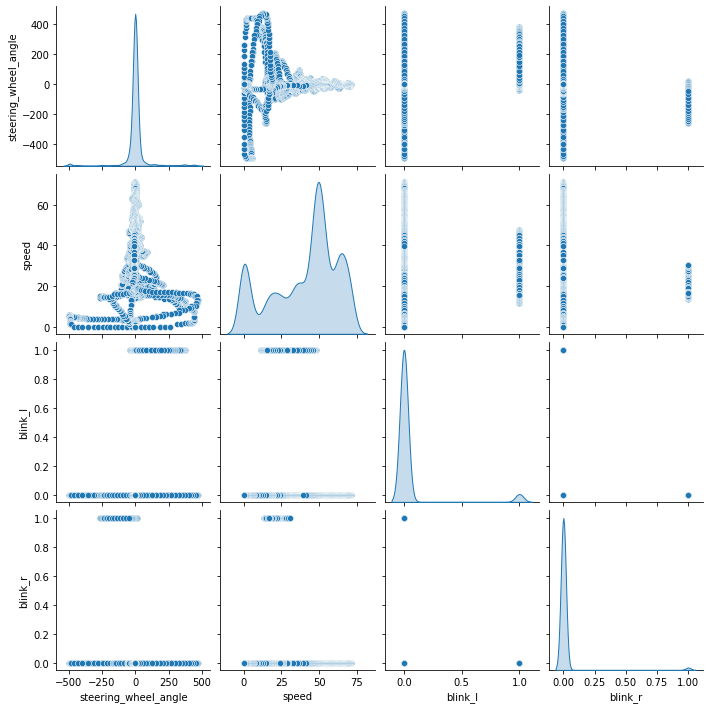

In [6]:
dataset.pairplot()

In [7]:
dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 2058 rows for reason: Low speed (< 25 km/h)
Removing 218 rows for reason: High SWA (> +45/ < -45 deg)
Removing 125 rows for reason: Left blinker on
Removing 1 rows for reason: Right blinker on
5694 samples remaining.


In [8]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,5694.0,-1.155364,12.883885,-44.830,-6.820,-1.440,3.9400,44.950
speed,5694.0,52.164229,11.050994,25.017,47.461,50.685,62.5425,71.362
blink_l,5694.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
blink_r,5694.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


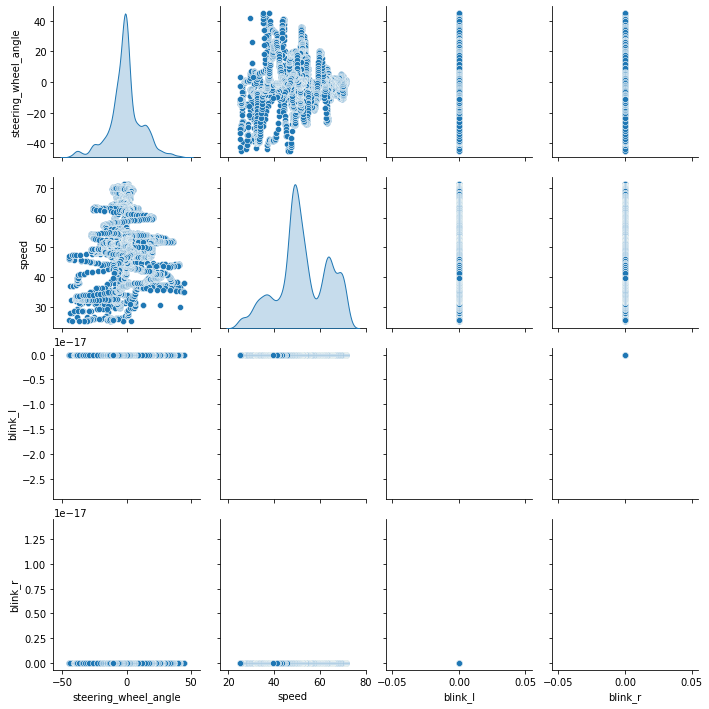

In [9]:
dataset.pairplot()

In [10]:
dataset.balance()

Balancing dataset. Starting with 5694 samples.
[28, 85, 33, 121, 148, 197, 351, 842, 1556, 984, 390, 339, 357, 97, 72, 52, 26, 16]
155
1918 samples remaining.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


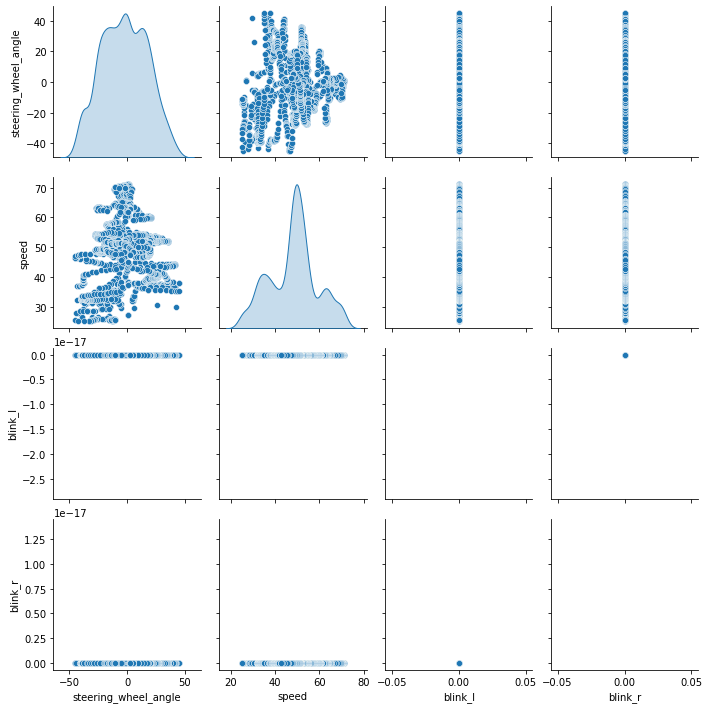

In [11]:
dataset.pairplot()

In [12]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1918.0,-2.345600,19.703556,-44.830,-17.765,-1.940,13.195,44.950
speed,1918.0,48.316571,10.725635,25.017,40.331,49.135,53.692,71.238
blink_l,1918.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
blink_r,1918.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [13]:
dataset.normalize()

In [14]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1918.0,-0.026062,0.218928,-0.498111,-0.197389,-0.021556,0.146611,0.499444
speed,1918.0,48.316571,10.725635,25.017000,40.331000,49.135000,53.692000,71.238000
blink_l,1918.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
blink_r,1918.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
gui = AutopilotGUI()
batch_gui = AutopilotGUI()

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array

In [17]:
def show_frame(index):
    
    frame = img_to_array(dataset.get_frame(index)[0], dtype=np.uint8)
    gui.set_frame(frame)
    gui.set_show_overlay(True)
    gui.set_engaged(False)
    gui.set_recording(True)
    
    blink_l = dataset.get_indicator_left(index)
    print("blink_l: " + str(blink_l))
    gui.set_indicator_left(blink_l)
    #gui.set_indicator_right(indicator_right)
    #gui.set_cruise_control(cruise_control)
    #gui.set_cruise_control_setpoint(cc_setpoint)
    
    velocity = dataset.get_velocity(index)
    gui.set_velocity(velocity)
    
    timestamp = dataset.get_timestamp(index)
    gui.set_timestring(timestamp)
    
    
    actual_swa = dataset.get_swa(index)*90
    print("actual_swa: " + str(actual_swa))
    gui.set_actual_swa(actual_swa)
    #gui.set_predicted_swa(predicted_swa)
    
    gui.show_jupyter()
    
    
from matplotlib import pyplot as plt
    
def show_crop(index, shift):
    frame = img_to_array(dataset.get_cropped_frame(index, shift)[0])
    plt.imshow(frame/255)
    plt.show()
    
    
def show_batch(batch_index, frame_index):
    batch = dataset.get_batch_features(batch_index)
    frame = batch[frame_index]
    
    labels = dataset.get_batch_labels(batch_index)
    actual_swa = labels[frame_index]*90
    
    batch_gui.set_frame(frame)
    batch_gui.set_show_overlay(True)
    batch_gui.set_engaged(False)
    batch_gui.set_recording(True)
    
    
    #velocity = dataset.get_velocity(index)
    #batch_gui.set_velocity(velocity)
    
    #timestamp = dataset.get_timestamp(index)
    #batch_gui.set_timestring(timestamp)
    
    
    #actual_swa = dataset.get_swa(index)*90
    print("actual_swa: " + str(actual_swa))
    batch_gui.set_actual_swa(actual_swa)
    #gui.set_predicted_swa(predicted_swa)
    
    batch_gui.show_jupyter()

In [18]:
import ipywidgets as widgets
frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)

In [19]:
from ipywidgets import interact

interact(show_frame, index=frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=1903), Output()), _…

In [20]:
batch_slider = widgets.IntSlider(min=0, max=len(dataset)-1, continuous_update=False)
batch_frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()-1, continuous_update=False)

interact(show_batch, batch_index=batch_slider, frame_index=batch_frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='batch_index', max=118), IntSlid…

In [21]:
crop_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)
shift_slider = widgets.IntSlider(min=-100, max=100, continuous_update=False)

In [22]:
interact(show_crop, index=crop_slider, shift = shift_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=1903), IntSlider(va…

In [23]:
train_stats = dataset.get_csv().describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1918.0,-0.026062,0.218928,-0.498111,-0.197389,-0.021556,0.146611,0.499444
speed,1918.0,48.316571,10.725635,25.017000,40.331000,49.135000,53.692000,71.238000
blink_l,1918.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
blink_r,1918.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
dataset.get_batch_labels(0)

array([-0.23444444, -0.40977778, -0.26188889, -0.02833333, -0.02088889,
        0.06011111, -0.20688889, -0.20988889,  0.31644444,  0.09477778,
       -0.079     , -0.26644444,  0.20388889, -0.14011111,  0.14366667,
       -0.20977778])

In [25]:
feature_batch = dataset.get_batch_features(0)
feature_batch

array([[[[ 89,  87,  75],
         [ 92,  90,  78],
         [ 86,  82,  71],
         ...,
         [ 60,  74,  87],
         [ 59,  73,  86],
         [ 60,  74,  87]],

        [[ 81,  87,  89],
         [112, 108,  97],
         [115, 111, 100],
         ...,
         [ 59,  73,  86],
         [ 59,  73,  86],
         [ 59,  73,  86]],

        [[ 59,  73,  86],
         [111, 105, 100],
         [119, 110, 101],
         ...,
         [ 59,  73,  86],
         [ 59,  73,  86],
         [ 59,  73,  86]],

        ...,

        [[ 25,  30,  26],
         [ 25,  30,  26],
         [ 25,  30,  26],
         ...,
         [ 23,  28,  24],
         [ 24,  29,  25],
         [ 24,  29,  25]],

        [[ 25,  30,  26],
         [ 25,  30,  26],
         [ 26,  31,  27],
         ...,
         [ 25,  30,  26],
         [ 25,  30,  26],
         [ 25,  30,  26]],

        [[ 25,  30,  26],
         [ 25,  30,  26],
         [ 25,  30,  26],
         ...,
         [ 28,  30,  27],
        

In [26]:
batch_count = len(dataset)
batch_count

119